In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models # type: ignore
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[:5]
#This is giving a 2D array which is not required I want individual values so reshape

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:

#-1 will make sure the row dimension remains same 
#but the blank will give us indiviual values
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

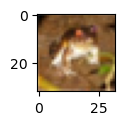

In [13]:
plt.figure(figsize=(1,2))
plt.imshow(X_train[0])

In [14]:
#The numbers associated with output in y are representing various classes i.e, various classes of images
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [15]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

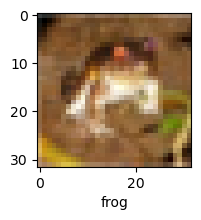

In [16]:
plot_sample(X_train,y_train,0)

In [17]:
#Normalize the data
X_train=X_train/255
X_test=X_test/255


In [20]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='SGD')
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3038 - loss: 1.9279
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4206 - loss: 1.6397
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4516 - loss: 1.5564
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4740 - loss: 1.4885
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4927 - loss: 1.4377
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5040 - loss: 1.4017
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5233 - loss: 1.3608
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5334 - loss: 1.3227
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5439 - loss: 1.2950
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5623 - loss: 1.2505


In [21]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5027 - loss: 1.3934


[1.3953425884246826, 0.5006999969482422]

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(ele) for ele in y_pred]
print("Classification_Report \n ",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification_Report 
                precision    recall  f1-score   support

           0       0.49      0.69      0.57      1000
           1       0.59      0.72      0.65      1000
           2       0.55      0.18      0.27      1000
           3       0.37      0.20      0.26      1000
           4       0.40      0.55      0.46      1000
           5       0.34      0.58      0.43      1000
           6       0.72      0.34      0.46      1000
           7       0.57      0.57      0.57      1000
           8       0.68      0.58      0.62      1000
           9       0.55      0.60      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000



In [27]:
#To increase the accuracy of our model now ill use cnn
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),#Convolutional Layer(Feature Detection),filters=no.of filters and kernel_size=dimension of each filter
    layers.MaxPooling2D((2,2)),#Max pooling layer
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),

    #Dense Layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3673 - loss: 1.7346
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5887 - loss: 1.1695
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6516 - loss: 1.0039
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6830 - loss: 0.9199
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7037 - loss: 0.8516
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7233 - loss: 0.8004
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7392 - loss: 0.7573
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7504 - loss: 0.7156
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7577 - loss: 0.6866
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7802 - loss: 0.6409


In [28]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6971 - loss: 0.8934


[0.9015780091285706, 0.6951000094413757]

In [30]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

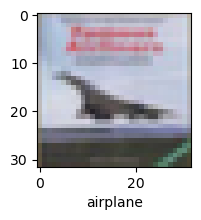

In [33]:
plot_sample(X_test,y_test,3)

In [34]:
y_pred=cnn.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.17593294e-05, 8.03210298e-07, 3.86761967e-04, ...,
        1.94699260e-06, 5.98168373e-03, 4.25221551e-05],
       [3.57399648e-03, 4.20745350e-02, 6.71239150e-07, ...,
        4.33886349e-08, 9.53962386e-01, 3.87791806e-04],
       [1.08385995e-01, 9.53219533e-02, 1.25717856e-02, ...,
        1.08763659e-02, 6.85795724e-01, 6.58927411e-02],
       ...,
       [4.14592614e-06, 2.45391902e-06, 1.27728004e-02, ...,
        4.77789864e-02, 1.80038442e-05, 2.13291805e-05],
       [1.60352439e-02, 6.35037899e-01, 2.20119301e-03, ...,
        1.19266442e-04, 9.86328814e-04, 1.05392479e-04],
       [2.46884007e-08, 2.69213979e-06, 4.75907524e-04, ...,
        9.98998344e-01, 5.56574832e-07, 3.24651091e-06]], dtype=float32)

In [36]:
y_classes=[np.argmax(ele) for ele in y_pred]

y_classes[:5]




[3, 8, 8, 0, 4]

In [37]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

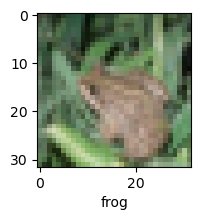

In [41]:
plot_sample(X_test,y_test,4)

In [42]:
classes[y_classes[4]]

'deer'

In [38]:
print("classification_report:\n",classification_report(y_test,y_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.88      0.74      0.80      1000
           2       0.54      0.61      0.57      1000
           3       0.51      0.49      0.50      1000
           4       0.61      0.68      0.64      1000
           5       0.66      0.56      0.60      1000
           6       0.80      0.75      0.78      1000
           7       0.76      0.74      0.75      1000
           8       0.81      0.79      0.80      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

